In [1]:
import pandas as pd
df_dis = pd.read_csv("LungDisease.csv")
df_dis.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [2]:
import matplotlib.pyplot as plt

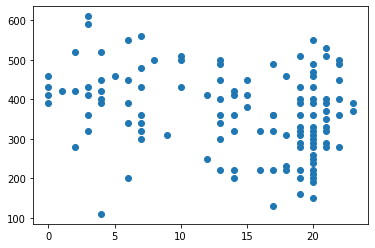

In [3]:
plt.scatter(y="PEFR", x="Exposure", data=df_dis)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
X = df_dis["Exposure"].values.reshape(-1, 1)
Y = df_dis["PEFR"].values
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
lr.intercept_, lr.coef_

(424.582806573957, array([-4.18457649]))

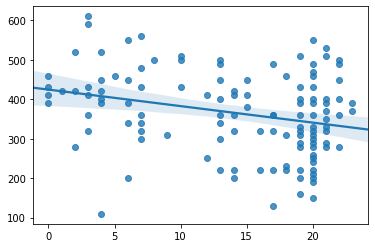

In [7]:
import seaborn as sns
sns.regplot(x=X, y=Y)

In [8]:
df_house = pd.read_csv("house_sales.csv", sep="\t")
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [9]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22689 entries, 1 to 27063
Data columns (total 22 columns):
DocumentDate       22689 non-null object
SalePrice          22689 non-null int64
PropertyID         22689 non-null int64
PropertyType       22689 non-null object
ym                 22689 non-null object
zhvi_px            22689 non-null int64
zhvi_idx           22689 non-null float64
AdjSalePrice       22689 non-null float64
NbrLivingUnits     22689 non-null int64
SqFtLot            22689 non-null int64
SqFtTotLiving      22689 non-null int64
SqFtFinBasement    22689 non-null int64
Bathrooms          22689 non-null float64
Bedrooms           22689 non-null int64
BldgGrade          22689 non-null int64
YrBuilt            22689 non-null int64
YrRenovated        22689 non-null int64
TrafficNoise       22689 non-null int64
LandVal            22689 non-null int64
ImpsVal            22689 non-null int64
ZipCode            22689 non-null int64
NewConstruction    22689 non-null bool
dty

In [10]:
df_house[["AdjSalePrice", "SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [11]:
X = df_house[["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]].values
Y = df_house["AdjSalePrice"]
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lr.coef_, lr.intercept_

(array([ 2.28832107e+02, -6.05060092e-02, -1.94380990e+04, -4.77811534e+04,
         1.06117210e+05]), -521924.72203797183)

In [13]:
from sklearn.metrics import classification_report
classification_report

<function sklearn.metrics.classification.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)>

In [14]:
df_house[["AdjSalePrice", "SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade", "PropertyType", "NbrLivingUnits",\
          "SqFtFinBasement", "YrBuilt", "YrRenovated", "NewConstruction"]].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,PropertyType,NbrLivingUnits,SqFtFinBasement,YrBuilt,YrRenovated,NewConstruction
1,300805.0,2400,9373,3.00,6,7,Multiplex,2,0,1991,0,False
2,1076162.0,3764,20156,3.75,4,10,Single Family,1,1452,2005,0,True
3,761805.0,2060,26036,1.75,4,8,Single Family,1,900,1947,0,False
4,442065.0,3200,8618,3.75,5,7,Single Family,1,1640,1966,0,False
5,297065.0,1720,8620,1.75,4,7,Single Family,1,0,1948,0,False


In [15]:
# Stepwise Regression

In [16]:
from sklearn.feature_selection import RFE
rfe = RFE(lr)

In [17]:
rfe.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

In [18]:
#PREDICTION INTERVAL through bootstrap

In [19]:
df_house["PropertyType"].head(6)

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
6        Townhouse
Name: PropertyType, dtype: object

In [20]:
dums = pd.get_dummies(df_house["PropertyType"], prefix="PropertyType").values
dums

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [21]:
x = df_house[["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]].values
x

array([[2.4000e+03, 9.3730e+03, 3.0000e+00, 6.0000e+00, 7.0000e+00],
       [3.7640e+03, 2.0156e+04, 3.7500e+00, 4.0000e+00, 1.0000e+01],
       [2.0600e+03, 2.6036e+04, 1.7500e+00, 4.0000e+00, 8.0000e+00],
       ...,
       [1.0700e+03, 1.1170e+04, 1.0000e+00, 4.0000e+00, 6.0000e+00],
       [1.3450e+03, 6.2230e+03, 2.0000e+00, 3.0000e+00, 7.0000e+00],
       [7.9000e+02, 4.4000e+03, 1.5000e+00, 3.0000e+00, 7.0000e+00]])

In [22]:
import numpy as np
X = np.hstack((x, np.delete(dums, axis=1, obj=0)))
X.shape

(22689, 7)

In [23]:
Y = df_house["AdjSalePrice"].values
lr.fit(X, Y)
lr.coef_, lr.intercept_

(array([ 2.23373864e+02, -7.04133567e-02, -1.59731350e+04, -5.09005961e+04,
         1.09426223e+05, -8.46913798e+04, -1.15147086e+05]),
 -446878.74196346826)

In [24]:
y_pred = lr.predict(X)
res = y_pred - Y
res

array([ 200414.12725075,   62388.44116854, -191203.83028012, ...,
        -77108.78577433,    7558.04596573, -241581.51772447])

In [25]:
zips = df_house["ZipCode"].values
zips.shape, res.shape
df_zip = pd.DataFrame(data=np.vstack((zips, res)).T, columns=["ZipCode", "Residual"])
df_zip.head()

,ZipCode,Residual
0,98002.0,200414.127251
1,98166.0,62388.441169
2,98166.0,-191203.830280
3,98168.0,192135.745903
4,98168.0,89389.151880


In [26]:
df_zip_med = df_zip.groupby("ZipCode").median().reset_index()
df_zip_med

,ZipCode,Residual
0,9800.0,-82868.024299
1,89118.0,58991.054565
2,98001.0,126702.753490
3,98002.0,67293.532073
4,98003.0,131956.426920
5,98004.0,-381699.190545
6,98005.0,-67339.260213
7,98006.0,11545.532055
8,98007.0,-44585.941821
9,98008.0,-55634.454117


In [27]:
#df_zip_med.sort_values?
zip_group = pd.qcut(x=df_zip_med["Residual"], q=5, labels=[1, 2, 3, 4 ,5])
df_zip_med["ZipGroup"] = zip_group
df_zip_med

,ZipCode,Residual,ZipGroup
0,9800.0,-82868.024299,1
1,89118.0,58991.054565,3
2,98001.0,126702.753490,5
3,98002.0,67293.532073,4
4,98003.0,131956.426920,5
5,98004.0,-381699.190545,1
6,98005.0,-67339.260213,2
7,98006.0,11545.532055,3
8,98007.0,-44585.941821,2
9,98008.0,-55634.454117,2


In [28]:
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [29]:
x = df_house[["SqFtLot", "Bedrooms", "BldgGrade", "YrBuilt"]].values
x
X = np.hstack((x, np.delete(dums, axis=1, obj=0)))
X.shape
Y = df_house["AdjSalePrice"].values
lr.fit(X, Y)
lr.coef_, lr.intercept_

(array([ 5.12646793e-01,  2.73528590e+04,  2.47348645e+05, -3.23393423e+03,
        -2.12052910e+04, -4.20606682e+04]), 4964478.39143504)

In [30]:
#zip group with num sales
#zip group & sqftliving
#lr for zip code 98105 -> standardize residuals -> get smallest res -> get that record
#influence or bubble plot
#sns geom smooth curve scatter with residuals and predicted values on scatter
#histogram of residuals
#partial residual plot
#poly reg with quad for sqfttoliving
#after spline res plot
#after GAM res plot

In [31]:
df_zip_med.head()

,ZipCode,Residual,ZipGroup
0,9800.0,-82868.024299,1
1,89118.0,58991.054565,3
2,98001.0,126702.753490,5
3,98002.0,67293.532073,4
4,98003.0,131956.426920,5


In [32]:
#df_Z.unique() == df_zip["ZipCode"].unique()

In [33]:
df_Z = df_house["ZipCode"]
print(df_zip_med.shape, df_Z.shape)
df_zip_med["ZipCode"].dtype, df_Z.astype(float).dtype
df_Z = pd.merge(left=df_Z, right=df_zip_med, on="ZipCode")
df_Z = df_Z.sort_values(by="ZipCode").reset_index().drop(["index"], axis=1)
df_Z

(82, 3) (22689,)


,ZipCode,Residual,ZipGroup
0,9800,-82868.024299,1
1,89118,58991.054565,3
2,98001,126702.753490,5
3,98001,126702.753490,5
4,98001,126702.753490,5
5,98001,126702.753490,5
6,98001,126702.753490,5
7,98001,126702.753490,5
8,98001,126702.753490,5
9,98001,126702.753490,5


In [34]:
X = df_house[["AdjSalePrice", "SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade", "ZipCode"]].sort_values(by="ZipCode").reset_index().drop(["index"], axis=1)
X.head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,ZipCode
0,1278632.0,4000,12998,3.50,4,10,9800
1,283826.0,2260,7752,2.00,5,6,89118
2,228204.0,1310,14400,1.50,3,7,98001
3,295407.0,2240,7200,2.75,4,7,98001
4,259023.0,1250,7200,1.50,3,7,98001


In [35]:
cols = np.concatenate([X.columns.to_numpy(), df_Z.columns.to_numpy()])
_, idx = np.unique(cols, return_index=True)

x = pd.DataFrame(data = np.hstack((X.values, np.delete(df_Z.values, axis=1, obj=0))), columns=cols[np.sort(idx)])
x.head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,ZipCode,Residual,ZipGroup
0,1.27863e+06,4000,12998,3.5,4,10,9800,-82868,1
1,283826,2260,7752,2,5,6,89118,58991.1,3
2,228204,1310,14400,1.5,3,7,98001,126703,5
3,295407,2240,7200,2.75,4,7,98001,126703,5
4,259023,1250,7200,1.5,3,7,98001,126703,5


In [36]:
lr.fit(x.drop(["AdjSalePrice"], 1).values, x["AdjSalePrice"].values)
lr.coef_, lr.intercept_

(array([ 2.16865649e+02,  5.51264765e-01, -1.08612912e+04, -3.40346949e+04,
         8.63425057e+04, -5.52620884e-01, -1.55157284e+00,  2.45370805e+04]),
 -425477.461385941)

In [37]:
#np.union1d(X.columns, df_Z.columns)

In [38]:
x["Inter"] = x["SqFtTotLiving"]*x["ZipGroup"]

In [39]:
lr.fit(x.drop(["AdjSalePrice"], 1).values, x["AdjSalePrice"].values)
lr.coef_, lr.intercept_

(array([ 3.34248028e+02,  6.54477000e-01, -1.78246839e+04, -3.76858076e+04,
         9.57256444e+04,  1.82306622e+00, -1.25811956e+00,  9.63164103e+04,
        -4.23932117e+01]), -898264.3820347897)

In [40]:
df_98105 = df_house[df_house["ZipCode"]==98105]
df_98105.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1036,2007-08-16,825000,394500005,Multiplex,2007-08-01,434600,0.998621,826139.0,2,7245,...,4.50,6,8,1961,0,2,280000,468000,98105,False
1769,2006-12-27,655000,714000130,Single Family,2006-12-01,423400,0.972886,673255.0,1,6750,...,1.75,4,8,1946,0,0,350000,417000,98105,False
1770,2007-10-11,650000,714000290,Single Family,2007-10-01,431300,0.991039,655878.0,1,6630,...,1.75,3,7,1946,0,0,350000,332000,98105,False
1771,2006-03-06,580000,714000330,Single Family,2006-03-01,392100,0.900965,643754.0,1,7130,...,1.75,3,7,1947,0,0,350000,350000,98105,False
1783,2008-05-28,1260000,723000114,Single Family,2008-05-01,407400,0.936121,1345979.0,1,8510,...,3.50,5,9,1971,0,0,593000,894000,98105,False


In [91]:
X = df_98105[["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]].values
Y = df_98105["AdjSalePrice"].values

In [92]:
lr.fit(X, Y)
lr.coef_, lr.intercept_

(array([ 2.09602346e+02,  3.89333150e+01,  2.28226415e+03, -2.63202688e+04,
         1.30000100e+05]), -772549.8624473594)

In [48]:
res = lr.predict(X)-Y
df_98105["Residual"] = res
df_98105.sort_values(by="Residual", ascending=True).head(1)

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Residual
14392,2011-08-01,1650000,4219400785,Single Family,2011-08-01,312700,0.71852,2296386.0,1,7200,...,4,9,1936,0,0,467000,1112000,98105,False,-953910.598809


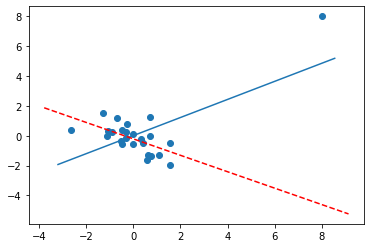

In [58]:
#df_98105.sort_values?
def abline(slope, intercept, org):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color="red") if org==1 else plt.plot(x_vals, y_vals)


np.random.seed(11)
x = np.random.randn(25)
y = -(x/5) + np.random.randn(25)
x[0] = 8
y[0] = 8
lr1 = LinearRegression()
lr1.fit(x.reshape(-1, 1), y)

lr2 = LinearRegression()
lr2.fit(x.reshape(-1, 1)[1:], y[1:])

plt.scatter(x, y)
abline(lr1.coef_, lr1.intercept_, 2)
abline(lr2.coef_, lr2.intercept_, 1)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_98105["RStandard"] = ss.fit_transform(df_98105["Residual"].values.reshape(-1, 1))
df_98105.sort_values(by="RStandard", ascending=False).head()

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Residual,RStandard
24333,2008-12-23,105000,8819900340,Single Family,2008-12-01,381600,0.876838,119748.0,1,7276,...,7,1921,1960,0,464000,284000,98105,False,757753.619212,4.286535
26041,2007-06-01,850000,9471200895,Single Family,2007-06-01,433200,0.995404,853924.0,1,9095,...,9,1950,0,2,422000,578000,98105,False,678022.504045,3.835505
24331,2006-10-12,851500,8819900210,Single Family,2006-10-01,418300,0.961167,885902.0,1,3750,...,10,2002,0,0,330000,772000,98105,False,462189.970639,2.614562
1036,2007-08-16,825000,394500005,Multiplex,2007-08-01,434600,0.998621,826139.0,2,7245,...,8,1961,0,2,280000,468000,98105,False,456062.232432,2.579898
26040,2007-05-08,2250000,9471200425,Single Family,2007-05-01,432100,0.992877,2266142.0,1,25114,...,12,1949,0,0,1218000,1943000,98105,False,410518.452550,2.322261


In [78]:
st_resid = df_98105["RStandard"].values

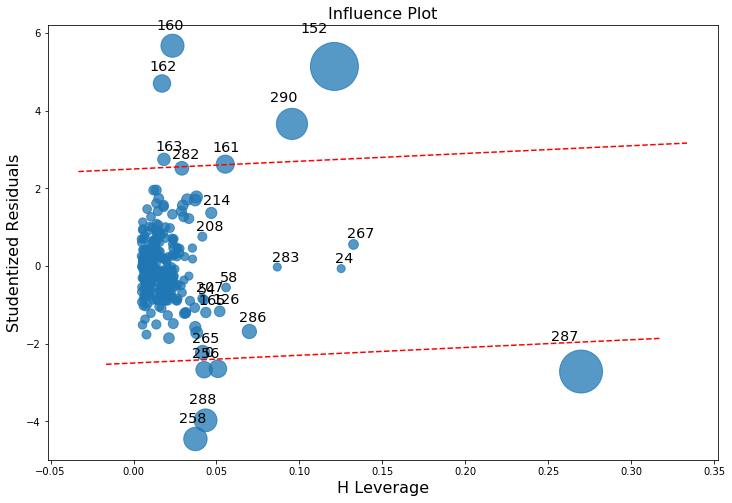

In [90]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12, 8)

x1 = df_98105[["SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]].values
y1 = df_98105["AdjSalePrice"].values
y0 = df_98105["AdjSalePrice"].values
lm = sm.OLS(y1, sm.add_constant(x1)).fit()


fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")
abline(2, -2.5, 1)
abline(2, 2.5, 1)

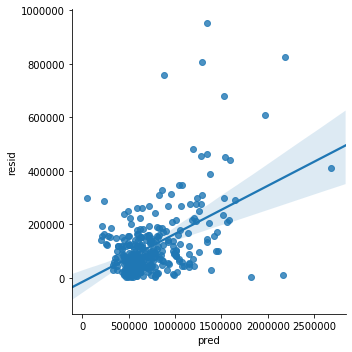

In [109]:
y_pred = lr.predict(X)
resid = abs(df_98105["Residual"].values)
Data = pd.DataFrame(data={"pred":y_pred, "resid":resid})
sns.lmplot(data=Data, x="pred", y="resid")

(array([  3.,   0.,   3.,  10.,  49., 153.,  81.,  10.,   2.,   2.]),
 array([-5.39617552, -4.42790443, -3.45963334, -2.49136225, -1.52309116,
        -0.55482007,  0.41345102,  1.38172211,  2.3499932 ,  3.31826429,
         4.28653538]),
 <a list of 10 Patch objects>)

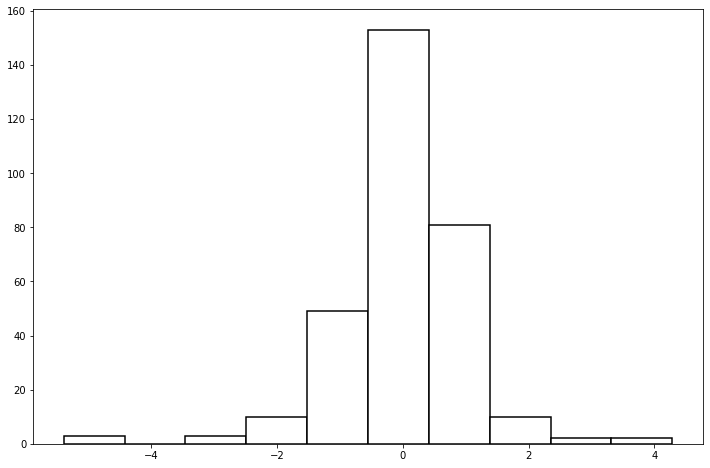

In [118]:
#sns.regplot?
plt.hist(x=df_98105["RStandard"].values, color="white", edgecolor="k", linewidth=1.5)

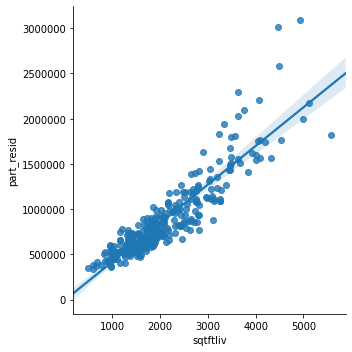

In [120]:
part_resid = y_pred + resid
sqtftliv = df_98105["SqFtTotLiving"].values
Data1 = pd.DataFrame(data={"sqtftliv":sqtftliv, "part_resid":part_resid})
sns.lmplot(data=Data1, x="sqtftliv", y="part_resid")

In [125]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
pol_Sq = pf.fit_transform(df_98105["SqFtTotLiving"].values.reshape(-1, 1))
Y = df_98105["AdjSalePrice"].values
X = df_98105[["BldgGrade", "Bathrooms", "Bedrooms", "SqFtLot"]].values
X = np.hstack((X, pol_Sq))
lmp = LinearRegression()
lmp.fit(X, Y)
lmp.coef_, lmp.intercept_

(array([ 1.35717060e+05, -1.43512310e+03, -9.19194413e+03,  3.25593549e+01,
         9.09494702e-13,  7.45213401e+00,  3.87912817e-02]),
 -615850.8417925744)

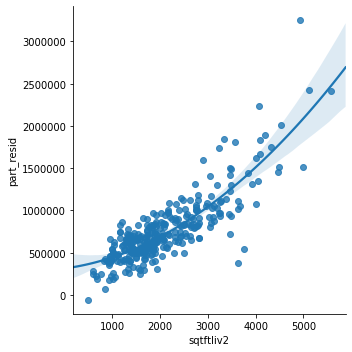

In [132]:
resid1 = lmp.predict(X)-Y
part_resid1  = lmp.predict(X)+resid1
Data2 = pd.DataFrame(data={"sqtftliv2":sqtftliv, "part_resid":part_resid1})
sns.lmplot(data=Data2, x="sqtftliv2", y="part_resid", order=2)

In [133]:
#after spline res plot sqfttoliving
#after GAM res plot sqfttoliving